## Data Exploration

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Users/jennytran/Documents/GitHub/smoc-project/data/SMOCDemoGCA.xlsx - SMOCDemoGCA.csv')

df = df[['person_id','Day','chat_room_id','z.participation',
 'z.social.impact',
 'z.overall.responsivity',
 'z.internal.cohesion',
 'z.newness',
 'z.comm.density',
 'SixCluster', 'Sex']]

df = df.dropna().reset_index(drop=True)

#Groups of only 4
df = df[df.groupby('chat_room_id')['chat_room_id'].transform('size') == 4].reset_index(drop=True)
chat_room_id = list(set(df['chat_room_id']))

In [8]:
len(df['person_id'].unique())

1401

In [9]:
#Number of Females
a = df[df['Sex'] == 2]
len(a['person_id'].unique())

847

In [10]:
#Number of Males
a = df[df['Sex'] == 1]
len(a['person_id'].unique())

554

## Female Majority, Minority, and Gender Parity

In [11]:
#Find number of females in a group -> df2
sex_lst = []
z_par = []
z_soc = []
z_overesp = []
z_internal = []
z_new = []
z_dens = []
num_females = []
for n in chat_room_id:
  a = df[df['chat_room_id'] == n]
  temp_sex = []
  for i in a['Sex']:
    temp_sex.append(i)
  sex_lst.append(temp_sex)
  z_par.append(sum(a['z.participation']) / len(a['z.participation']))
  z_soc.append(sum(a['z.social.impact']) / len(a['z.social.impact']))
  z_overesp.append(sum(a['z.overall.responsivity']) / len(a['z.overall.responsivity']))
  z_internal.append(sum(a['z.internal.cohesion']) / len(a['z.internal.cohesion']))
  z_new.append(sum(a['z.newness']) / len(a['z.newness']))
  z_dens.append(sum(a['z.comm.density']) / len(a['z.comm.density']))

for n in sex_lst:
  num_females.append(n.count(2))

d = {"chat_room_id": chat_room_id, "Number of Females": num_females ,"Gender": sex_lst, 'avg_participation': z_par, 'avg_social.impact': z_soc,'avg_overall.responsivity': z_overesp,'avg_internal.cohesion': z_internal,'avg_newness': z_new,'avg_comm.density': z_dens}
df2 = pd.DataFrame(d)
df2.drop(df2.loc[df2['Number of Females']==0].index, inplace=True)
df2.drop(df2.loc[df2['Number of Females']==4].index, inplace=True)
df2.reset_index()

,index,chat_room_id,Number of Females,Gender,avg_participation,avg_social.impact,avg_overall.responsivity,avg_internal.cohesion,avg_newness,avg_comm.density
0,0,classChat-1006-6818,2,"[1.0, 2.0, 2.0, 1.0]",-0.006825,-0.770453,-0.718806,-0.465317,-0.159675,-0.085856
1,1,classChat-826-4605,2,"[2.0, 2.0, 1.0, 1.0]",0.013880,-0.110327,-0.142406,-0.232607,-0.174208,-0.141597
2,3,classChat-1006-6759,2,"[1.0, 2.0, 1.0, 2.0]",0.051678,-0.530079,-0.514029,0.454736,-0.237458,-0.087081
3,4,classChat-806-3940,3,"[1.0, 2.0, 2.0, 2.0]",0.177850,-0.030625,0.067163,-0.046121,-0.013785,-0.115418
4,5,classChat-806-4028,2,"[1.0, 2.0, 1.0, 2.0]",-0.129085,0.245239,0.335572,0.495056,-0.346896,-0.418761
...,...,...,...,...,...,...,...,...,...,...
631,754,classChat-1403-13466,3,"[2.0, 2.0, 2.0, 1.0]",-0.025065,-0.685995,-0.631283,-0.350009,-0.172490,-0.070490
632,756,classChat-806-3983,2,"[2.0, 2.0, 1.0, 1.0]",0.292712,0.310650,0.332839,0.038180,-0.132631,-0.208648
633,757,classChat-1492-14647,3,"[2.0, 2.0, 1.0, 2.0]",-0.117982,-0.638166,-0.583704,-0.548832,-0.159780,-0.013300
634,758,classChat-1403-13559,3,"[2.0, 2.0, 2.0, 1.0]",-0.328594,0.294396,0.147563,-0.097019,-0.180462,-0.162110


In [12]:
num = [1,2,3]
z_par = []
z_soc = []
z_overesp = []
z_internal = []
z_new = []
z_dens = []
for n in num:
  if n == 1:
    y = df2.loc[df2['Number of Females'] <= n]
    z_par.append(sum(y['avg_participation']) / len(y))
    z_soc.append(sum(y['avg_social.impact']) / len(y))
    z_overesp.append(sum(y['avg_overall.responsivity']) / len(y))
    z_internal.append(sum(y['avg_internal.cohesion']) / len(y))
    z_new.append(sum(y['avg_newness']) / len(y))
    z_dens.append(sum(y['avg_comm.density']) / len(y))
  elif n == 2:
    y = df2.loc[df2['Number of Females'] == n]
    z_par.append(sum(y['avg_participation']) / len(y))
    z_soc.append(sum(y['avg_social.impact']) / len(y))
    z_overesp.append(sum(y['avg_overall.responsivity']) / len(y))
    z_internal.append(sum(y['avg_internal.cohesion']) / len(y))
    z_new.append(sum(y['avg_newness']) / len(y))
    z_dens.append(sum(y['avg_comm.density']) / len(y))
  elif n == 3:
    y = df2.loc[df2['Number of Females'] >= n]
    z_par.append(sum(y['avg_participation']) / len(y))
    z_soc.append(sum(y['avg_social.impact']) / len(y))
    z_overesp.append(sum(y['avg_overall.responsivity']) / len(y))
    z_internal.append(sum(y['avg_internal.cohesion']) / len(y))
    z_new.append(sum(y['avg_newness']) / len(y))
    z_dens.append(sum(y['avg_comm.density']) / len(y))

In [13]:
plotdata = pd.DataFrame({
    "z.participation":z_par,
    "z.social.impact":z_soc,
    "z.overall.responsivity":z_overesp,
    "z.internal.cohesion":z_internal,
    "z.newness":z_new,
    "z.comm.density":z_dens

    }, 
    index=['female minority', 'gender parity', 'female majority']
)

plotdata = plotdata + .20

(array([0, 1, 2]),
 [Text(0, 0, 'female minority'),
  Text(1, 0, 'gender parity'),
  Text(2, 0, 'female majority')])

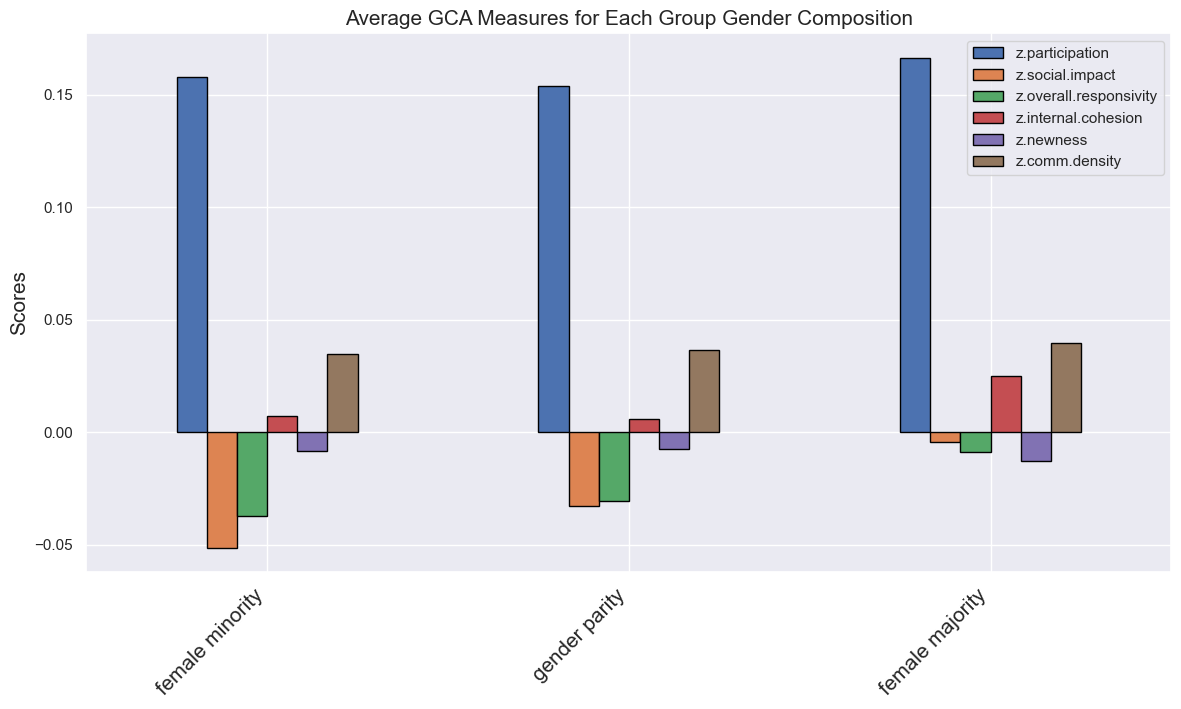

In [14]:
sns.set()
CB_color_cycle = ['#6cc0e5', '#fbc93d', '#fb4f4f',
                  '#F0E442', '#0072B2', '#D55E00',
                  '#999999', '#e41a1c', '#dede00']
plotdata.plot(kind="bar", figsize=(14, 7), edgecolor = 'black')
plt.title("Average GCA Measures for Each Group Gender Composition", fontsize=15)
#plt.xlabel("Gender Compositions")
plt.ylabel("Scores", fontsize=15)
plt.xticks(rotation=45, ha='right', fontsize=15)

## Mean measure for female students

In [9]:
sex_lst = []
num_females = []
for n in df['chat_room_id']:
  a = df[df['chat_room_id'] == n]
  temp_sex = []
  for i in a['Sex']:
    temp_sex.append(i)
  sex_lst.append(temp_sex)
for n in sex_lst:
  num_females.append(n.count(2))
len(num_females)

3040

In [10]:
df['Number of Females'] = num_females
df_fem = df.loc[df['Sex']==2]
#df_fem.drop(df_fem.loc[df_fem['Number of Females']==0].index, inplace=True)
df_fem.drop(df_fem.loc[df_fem['Number of Females']==4].index, inplace=True)
df_fem.reset_index(drop = True)

/shared-libs/python3.9/py/lib/python3.9/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,person_id,Day,chat_room_id,z.participation,z.social.impact,z.overall.responsivity,z.internal.cohesion,z.newness,z.comm.density,SixCluster,Sex,Number of Females
0,7.575438e+04,4,classChat-1006-6769,-7.410434e-01,-0.770453,0.602033,-0.912303,-0.551624,-0.410138,5,2.0,1
1,7.575438e+04,8,classChat-1403-13615,-7.410434e-01,-0.770453,0.602033,-0.912303,-0.551624,-0.511968,5,2.0,2
2,3.548091e+05,1,classChat-806-4046,-6.310821e-01,0.357350,0.317717,0.686412,-0.551624,-0.511968,6,2.0,3
3,3.548091e+05,9,classChat-1492-14789,-8.424493e-01,-0.770453,-0.718806,-0.702146,-0.551624,-0.511968,4,2.0,3
4,4.401338e+05,5,classChat-1176-8160,8.151477e-01,0.677761,0.357818,0.686412,-0.334546,-0.166306,2,2.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1438,9.909364e+07,9,classChat-1492-14615,-5.477277e-01,-0.526620,-0.701131,-0.657566,-0.421271,-0.021296,4,2.0,3
1439,9.914771e+07,9,classChat-1492-14710,8.151477e-01,-0.770453,-0.243971,-0.912303,-0.514112,0.171010,1,2.0,3
1440,9.914771e+07,4,classChat-1006-6726,1.200000e-17,-0.768057,-0.145738,-0.456536,-0.078973,-0.103386,1,2.0,3
1441,9.914771e+07,5,classChat-1176-8312,7.410434e-01,-0.019031,-0.519231,0.339972,0.203208,0.228773,1,2.0,3


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'z.participation'),
  Text(1, 0, 'z.social.impact'),
  Text(2, 0, 'z.overall.responsivity'),
  Text(3, 0, 'z.internal.cohesion'),
  Text(4, 0, 'z.newness'),
  Text(5, 0, 'z.comm.density')])

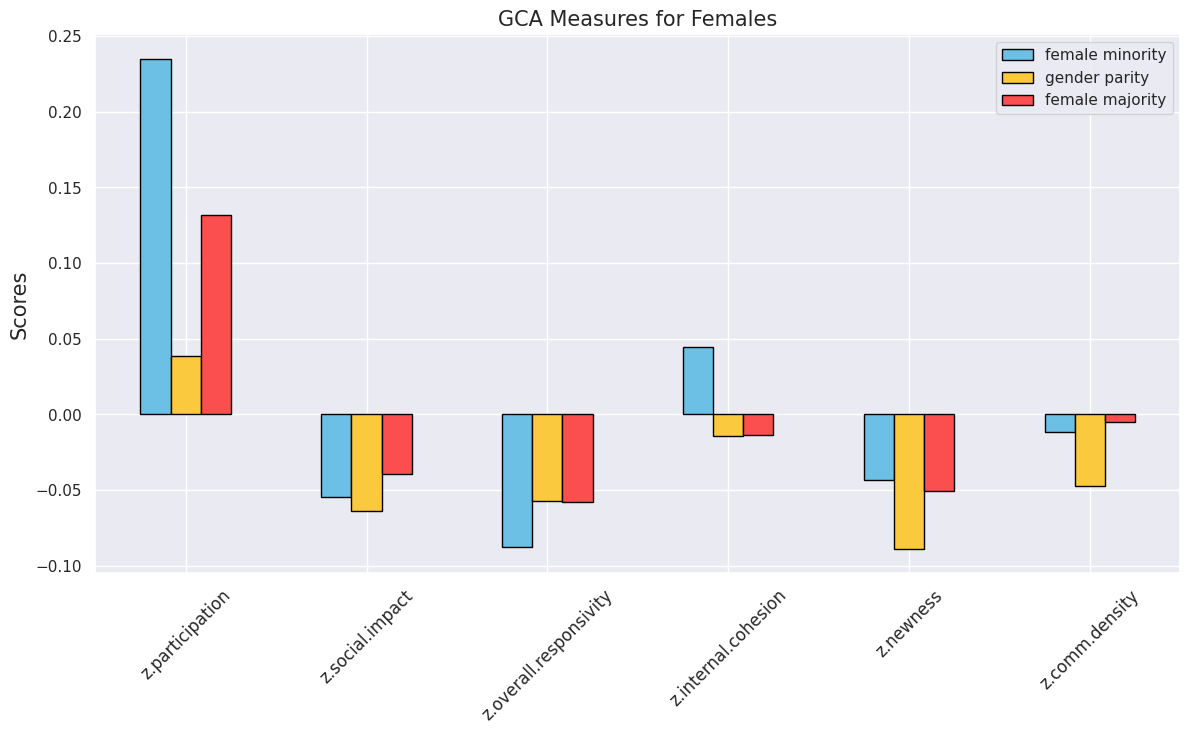

In [11]:
#chat_room_id = list(set(df_fem['chat_room_id']))
num = [1,2,3]
z_par = []
z_soc = []
z_overesp = []
z_internal = []
z_new = []
z_dens = []
for n in num:
  if n == 1:
    y = df_fem.loc[df_fem['Number of Females'] <= n]
    z_par.append(sum(y['z.participation']) / len(y))
    z_soc.append(sum(y['z.social.impact']) / len(y))
    z_overesp.append(sum(y['z.overall.responsivity']) / len(y))
    z_internal.append(sum(y['z.internal.cohesion']) / len(y))
    z_new.append(sum(y['z.newness']) / len(y))
    z_dens.append(sum(y['z.comm.density']) / len(y))
  elif n == 2:
    y = df_fem.loc[df_fem['Number of Females'] == n]
    z_par.append(sum(y['z.participation']) / len(y))
    z_soc.append(sum(y['z.social.impact']) / len(y))
    z_overesp.append(sum(y['z.overall.responsivity']) / len(y))
    z_internal.append(sum(y['z.internal.cohesion']) / len(y))
    z_new.append(sum(y['z.newness']) / len(y))
    z_dens.append(sum(y['z.comm.density']) / len(y))
  elif n == 3:
    y = df_fem.loc[df_fem['Number of Females'] >= n]
    z_par.append(sum(y['z.participation']) / len(y))
    z_soc.append(sum(y['z.social.impact']) / len(y))
    z_overesp.append(sum(y['z.overall.responsivity']) / len(y))
    z_internal.append(sum(y['z.internal.cohesion']) / len(y))
    z_new.append(sum(y['z.newness']) / len(y))
    z_dens.append(sum(y['z.comm.density']) / len(y))

plotdata = pd.DataFrame({
    "z.participation":z_par,
    "z.social.impact":z_soc,
    "z.overall.responsivity":z_overesp,
    "z.internal.cohesion":z_internal,
    "z.newness":z_new,
    "z.comm.density":z_dens

    }, 
    index=['female minority', 'gender parity', 'female majority']
)

plotdata = plotdata + .15
plotdata = plotdata.transpose()

plotdata.plot(kind="bar", figsize=(14, 7), color = CB_color_cycle, edgecolor = 'black')
plt.title("GCA Measures for Females", fontsize=15)
#plt.xlabel("Gender Compositions")
plt.ylabel("Scores", fontsize=15)
plt.xticks(rotation=45, fontsize=12)

/shared-libs/python3.9/py/lib/python3.9/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Participation'),
  Text(1, 0, 'Social Impact'),
  Text(2, 0, 'Overall Responsivity'),
  Text(3, 0, 'Internal Cohesion'),
  Text(4, 0, 'Newness'),
  Text(5, 0, 'Communication Density')])

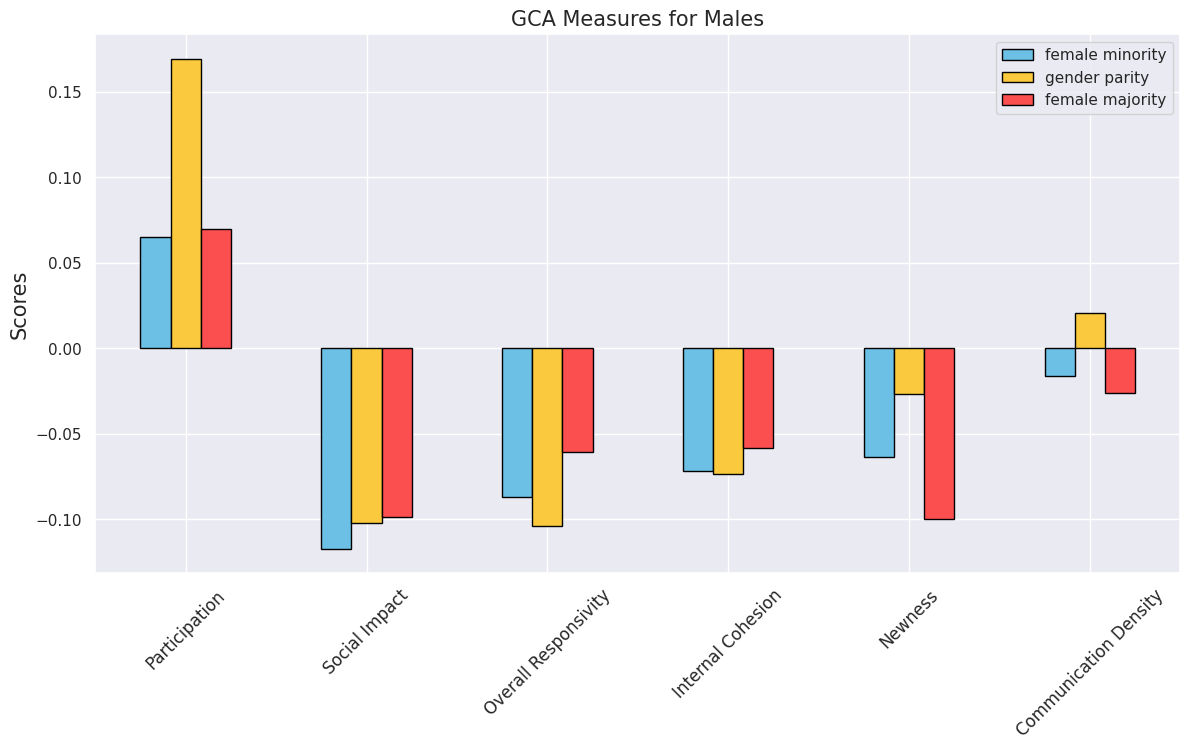

In [12]:
df_male = df.loc[df['Sex']==1]
df_male.drop(df_male.loc[df_male['Number of Females']==0].index, inplace=True)
df_male.reset_index(drop = True)

num = [1,2,3]
z_par = []
z_soc = []
z_overesp = []
z_internal = []
z_new = []
z_dens = []
for n in num:
  if n == 1:
    y = df_male.loc[df_male['Number of Females'] <= n]
    z_par.append(sum(y['z.participation']) / len(y))
    z_soc.append(sum(y['z.social.impact']) / len(y))
    z_overesp.append(sum(y['z.overall.responsivity']) / len(y))
    z_internal.append(sum(y['z.internal.cohesion']) / len(y))
    z_new.append(sum(y['z.newness']) / len(y))
    z_dens.append(sum(y['z.comm.density']) / len(y))
  elif n == 2:
    y = df_male.loc[df_male['Number of Females'] == n]
    z_par.append(sum(y['z.participation']) / len(y))
    z_soc.append(sum(y['z.social.impact']) / len(y))
    z_overesp.append(sum(y['z.overall.responsivity']) / len(y))
    z_internal.append(sum(y['z.internal.cohesion']) / len(y))
    z_new.append(sum(y['z.newness']) / len(y))
    z_dens.append(sum(y['z.comm.density']) / len(y))
  elif n == 3:
    y = df_male.loc[df_male['Number of Females'] >= n]
    z_par.append(sum(y['z.participation']) / len(y))
    z_soc.append(sum(y['z.social.impact']) / len(y))
    z_overesp.append(sum(y['z.overall.responsivity']) / len(y))
    z_internal.append(sum(y['z.internal.cohesion']) / len(y))
    z_new.append(sum(y['z.newness']) / len(y))
    z_dens.append(sum(y['z.comm.density']) / len(y))

plotdata = pd.DataFrame({
    "Participation":z_par,
    "Social Impact":z_soc,
    "Overall Responsivity":z_overesp,
    "Internal Cohesion":z_internal,
    "Newness":z_new,
    "Communication Density":z_dens

    }, 
    index=['female minority', 'gender parity', 'female majority']
)

plotdata = plotdata + .15
plotdata = plotdata.transpose()

plotdata.plot(kind="bar", figsize=(14, 7), color = CB_color_cycle, edgecolor = 'black')
plt.title("GCA Measures for Males", fontsize=15)
#plt.xlabel("Gender Compositions")
plt.ylabel("Scores", fontsize=15)
plt.xticks(rotation=45, fontsize=12)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=227f84b8-94f9-4b52-a4a0-d5e48ecc818e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>